In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.preprocessing import StandardScaler # normalização de dados
from sklearn.model_selection import train_test_split # dividir dados entre treinmaneto e teste
from sklearn.metrics import mean_absolute_error
from tensorflow import keras

In [2]:
dataset_petr4 = pd.read_csv("PETR4.csv")
dataset_brent = pd.read_csv("brent_oil_futures.csv")


In [3]:
dataset_petr4 = dataset_petr4.dropna()

In [4]:
dataset_brent = dataset_brent.dropna()

In [5]:
dataset = pd.merge(dataset_petr4,dataset_brent, on="Date")

In [6]:
rename_colums = {
    "Price_x":"Price_petr4",
    "Price_y":"Price_brent",
    "Open_y":"Open_brent",
    "Vol._y":"Vol._brent"
}
dataset = dataset.rename(columns=rename_colums)

In [7]:
volumes = []
for volume in dataset['Vol._brent']:
    if 'M' in volume:
        volume = float(volume.replace('M',''))*1000000
    elif 'K' in volume:
        volume = float(volume.replace('K',''))*1000
    volumes.append(volume)

In [8]:
y = dataset["Price_petr4"]

In [9]:
dataset['Vol._brent'] = pd.Series(volumes)

In [10]:
dataset_features = ['Price_brent', "Open_brent", "Vol._brent"]
X = dataset[dataset_features]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation = "relu"))
model.add(keras.layers.Dense(30, activation ="relu"))
model.add(keras.layers.Dense(1))  


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['mean_absolute_error']
)
model.fit(
 X_train,
 y_train,
 epochs = 100,
 batch_size = 32
)



In [ ]:
print("The predictions are")
y_predicted = model.predict(X_test)

In [15]:

print("MAE")
mae = mean_absolute_error(y_test, y_predicted)
print("Value:",mae)

MAE
Value: 7.406794001589652


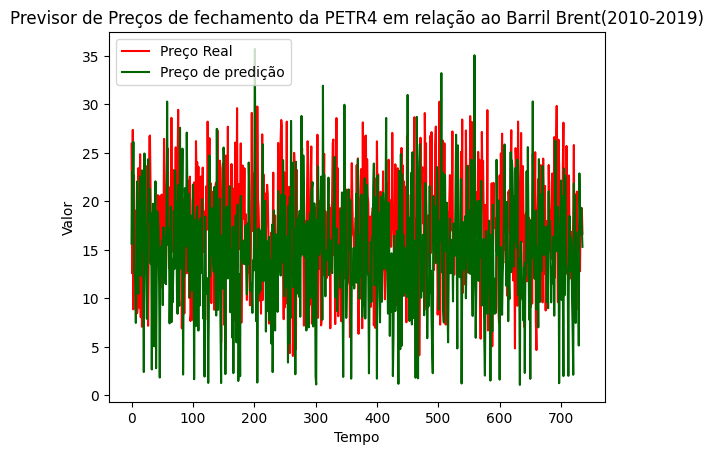

In [16]:
plt.plot(pd.array(y_test), color = 'red',label = 'Preço Real')
plt.plot(y_predicted, color = 'darkgreen', label="Preço de predição")
plt.title('Previsor de Preços de fechamento da PETR4 em relação ao Barril Brent(2010-2019)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()